<a href="https://colab.research.google.com/github/auzaluis/upsa_mod_202501/blob/main/whisky/01_script_anacor_whisky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de correspondencias

In [1]:
import pandas as pd

In [2]:
## Importar Excel
path = '/content/drive/MyDrive/Teaching/UPSA/2025.01/MOD/whisky/whisky_db.xlsx'
df = pd.read_excel(path)

In [3]:
df.head()

,Precio razonable,Nivel de alcohol óptimo,Que no le haga dar resaca,Presentación del empaque / botella,Ideal para celebrar algo,Que lo haga verse bien,Variedad de maduración (años)
0,Johnnie Walker,Chivas Regal,Chivas Regal,Johnnie Walker,Johnnie Walker,Johnnie Walker,Johnnie Walker
1,Johnnie Walker,Jack Daniel's,Chivas Regal,Old Parr,Johnnie Walker,Jack Daniel's,Jack Daniel's
2,Johnnie Walker,Johnnie Walker,Johnnie Walker,Jack Daniel's,Jack Daniel's,Old Parr,Jack Daniel's
3,Chivas Regal,Johnnie Walker,Jack Daniel's,Jack Daniel's,Johnnie Walker,Old Parr,Johnnie Walker
4,Johnnie Walker,Johnnie Walker,Johnnie Walker,Johnnie Walker,Johnnie Walker,Johnnie Walker,Johnnie Walker


In [4]:
# Pivotar tabla
df_pivot = df.melt(
    var_name='atributo',
    value_name='marcas'
)

In [5]:
df_pivot.head()

,atributo,marcas
0,Precio razonable,Johnnie Walker
1,Precio razonable,Johnnie Walker
2,Precio razonable,Johnnie Walker
3,Precio razonable,Chivas Regal
4,Precio razonable,Johnnie Walker


In [7]:
# Tabla de contingencia
tabla_cont = pd.crosstab(
    index = df_pivot['atributo'],
    columns = df_pivot['marcas']
)

In [10]:
tabla_cont

marcas,Chivas Regal,Jack Daniel's,Johnnie Walker,Old Parr
atributo,,,,
Ideal para celebrar algo,15,26,62,17
Nivel de alcohol óptimo,17,18,59,26
Precio razonable,41,15,42,22
Presentación del empaque / botella,16,31,53,20
Que lo haga verse bien,15,32,56,17
Que no le haga dar resaca,22,23,52,23
Variedad de maduración (años),18,26,54,22


In [ ]:
!pip install prince
import prince

In [13]:
# Análisis de correspondencias
ca = prince.CA(n_components=2)
ca = ca.fit(tabla_cont)

In [19]:
# coordenadas de los artibutos
coord_atributos = ca.row_coordinates(tabla_cont)
coord_atributos['Tipo'] = 'Atributos'
coord_atributos

,0,1,Tipo
atributo,,,
Ideal para celebrar algo,-0.146959,0.006788,Atributos
Nivel de alcohol óptimo,-0.015462,0.180974,Atributos
Precio razonable,0.468325,-0.048534,Atributos
Presentación del empaque / botella,-0.128397,-0.071164,Atributos
Que lo haga verse bien,-0.172131,-0.096877,Atributos
Que no le haga dar resaca,0.048109,0.022182,Atributos
Variedad de maduración (años),-0.053486,0.006631,Atributos


In [20]:
# coordenadas de las marcas
coord_marcas = ca.column_coordinates(tabla_cont)
coord_marcas['Tipo'] = 'Marcas'
coord_marcas

,0,1,Tipo
marcas,,,
Chivas Regal,0.414270,-0.065309,Marcas
Jack Daniel's,-0.195895,-0.132499,Marcas
Johnnie Walker,-0.092994,0.042969,Marcas
Old Parr,0.061188,0.107616,Marcas


In [30]:
coord = pd.concat([coord_atributos, coord_marcas]) \
.reset_index() \
.rename(columns={
    'index':'Label',
    0: 'Dim1',
    1: 'Dim2'
})

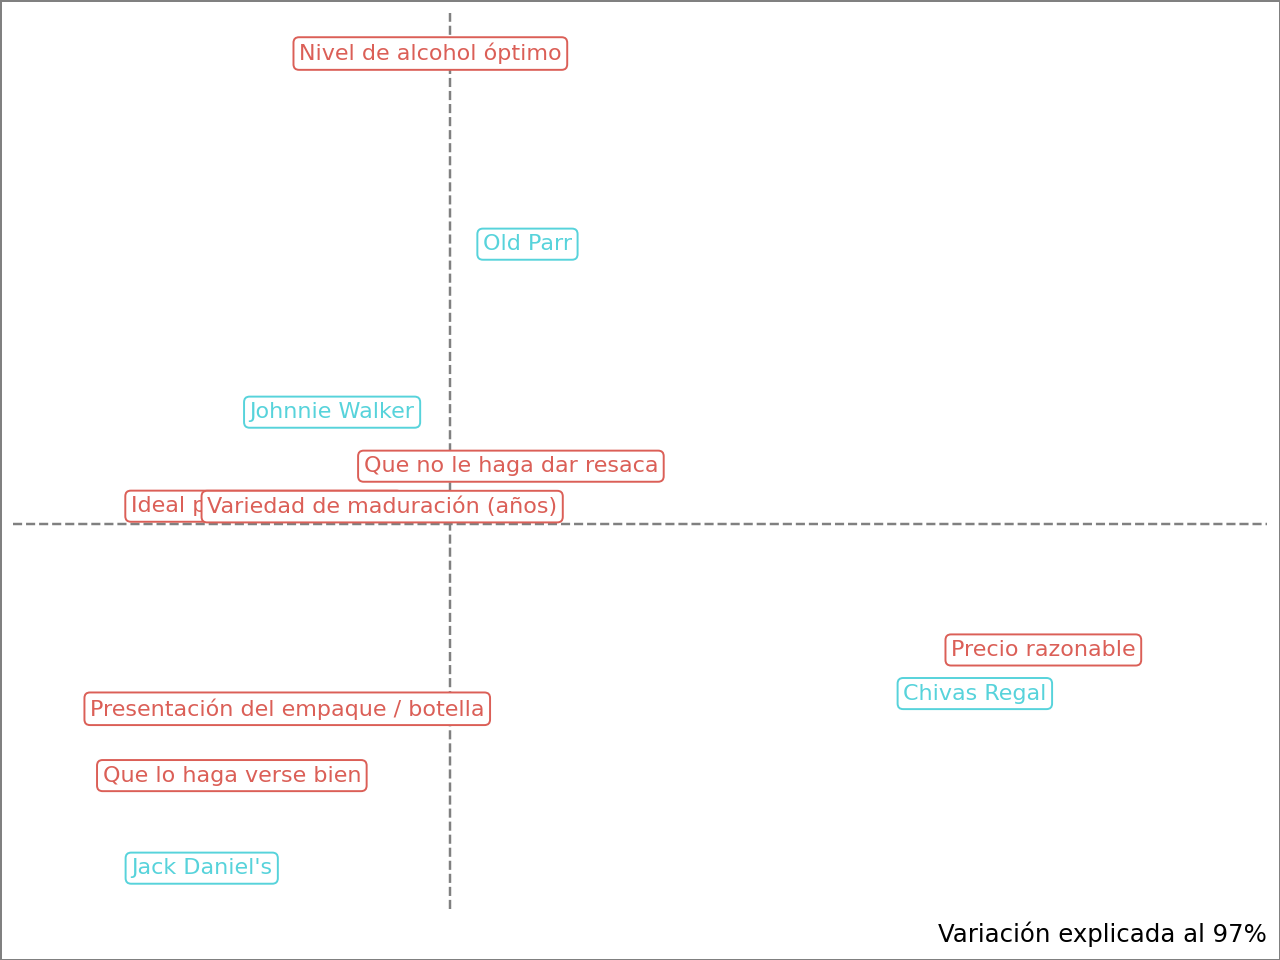

In [52]:
# Gráfica
from plotnine import *
ggplot(coord, aes(x = 'Dim1', y = 'Dim2', label = 'Label', color = 'Tipo')) \
+ geom_vline(xintercept = 0, color = 'gray', linetype = 'dashed') \
+ geom_hline(yintercept = 0, color = 'gray', linetype = 'dashed') \
+ geom_point() \
+ geom_label(size = 8) \
+ labs(caption = 'Variación explicada al 97%') \
+ expand_limits(x = (-0.3,0.6)) \
+ theme_minimal() \
+ theme(
    legend_position = 'none',
    panel_grid = element_blank(),
    plot_background = element_rect(color = 'gray'),
    axis_text = element_blank(),
    axis_title = element_blank()
)

In [51]:
ca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.042,82.34%,82.34%
1,0.007,14.12%,96.46%
